# AvocadoPriceAnalysisAndPrediction_Part2
## [Model defintion and deployment]
#### Avocado Prices and Sales Volume in multiple US markets (2015-2020)


## Content

###Model 1: Stateful LSTM model (FOCUS)
###Model 2: Stateless LSTM model (Benchmark 1)
###Model 3: Classical time series analysis: SARIMA (Benchmark 2)


##### Input data：AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv#####
    After the Part 1 of data cleansing and some general feature creation, I created a dataset called AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv b
    The original data I used in this project is from Kaggle page (https://www.kaggle.com/alanluo418/avocado-prices-20152019). All the data was obtained from the Hass Avocado Board website in January of 2020.
    The above page refers to an earlier Kaggle page about Avocado price (https://www.kaggle.com/neuromusic/avocado-prices).

##### Columns in the input dataset AvocadoPriceTotalUS20152019.csv#####
    Date - The date of the observation
    AveragePrice - The Average Sales Price of Current Year
    Total Volume - Total Bulk and Bags Units
    4046 - Total number of avocados with PLU 4046 sold
    4225 - Total number of avocados with PLU 4225 sold
    4770 - Total number of avocados with PLU 4770 sold
    Total Bags - 
    Small Bags - 
    Large Bags - 
    XLarge Bags - 
    type - conventional or organic
    year - the current year
    region - original region name with not consistent name
    Month - the current month
    Region - region names after unification
    name - region name in the orginal geo_dataframe
    pop - population of the region
    lat - latitude of the region
    lon - longitude of the region
    
    -------------------------------------------------------

    TotalVolume = 4046 + 4225 + 4770 + TotalBags
    TotalBags = SmallBags + LargeBags + XLargeBags

##### Output dataset and model #####
    Here we want to use the deep learning algorithum Long-shortTermMemory (LSTM) to predict the price of avocado in the future. In order to better evaluate the performance of this algorithum, we compare the performance of LSTM-method to the other machine learning algorithum (e.g. DecisionTree, RandomFrorest, KNearestNeighbors, SVR, AdaBoost, GradientBoost, XGBoost and CatBoost), classical ARIMA and dfprophet API, which is an additive regression model with four main components
    
    Model Definition:
    1. Identify the relevant data columns
    2. Prepare relevant data for the each algorithum
    
    Model Deployement:
    1.
    



#Recap of the cleansed data and Usecase motivation

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import pandas as pd
import json
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import pandas as pd
url = 'https://raw.githubusercontent.com/jingliu8876133/AvocadoData/master/AfterCleansingFeatureCreation_AvocadoPriceUSA20152019.csv'
df = pd.read_csv(url,index_col=0)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Region,name,pop,lat,lon
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,98012.0,42.651167,-73.754968
1,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,77746.0,42.651167,-73.754968
2,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,51053.0,42.651167,-73.754968
3,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,18767.0,42.651167,-73.754968
4,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,Albany,Albany,98012.0,42.651167,-73.754968


In [0]:
df=df.set_index('Date')
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Region,name,pop,lat,lon
Date,,,,,,,,,,,,,,,,,,
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,98012.0,42.651167,-73.754968
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,77746.0,42.651167,-73.754968
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,51053.0,42.651167,-73.754968
2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,Albany,Albany,18767.0,42.651167,-73.754968
2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,Albany,Albany,98012.0,42.651167,-73.754968


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32384 entries, 2015-01-04 to 2019-12-01
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  32384 non-null  float64
 1   Total Volume  32384 non-null  float64
 2   4046          32384 non-null  float64
 3   4225          32384 non-null  float64
 4   4770          32384 non-null  float64
 5   Total Bags    32384 non-null  float64
 6   Small Bags    32384 non-null  float64
 7   Large Bags    32384 non-null  float64
 8   XLarge Bags   32384 non-null  float64
 9   type          32384 non-null  object 
 10  year          32384 non-null  int64  
 11  region        32384 non-null  object 
 12  Month         32384 non-null  int64  
 13  Region        32384 non-null  object 
 14  name          25806 non-null  object 
 15  pop           25806 non-null  float64
 16  lat           25806 non-null  float64
 17  lon           25806 non-null  float64
dtypes: float64(12), i

In [0]:

conventional = df[df.type =='conventional']
conventional_groupByDate = conventional.groupby('Date').mean()
organic = df[df.type =='organic'].groupby('Date').mean()
organic_groupByDate = organic.groupby('Date').mean()
organic_groupByDate.head()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,pop,lat,lon
Date,,,,,,,,,,,,,,
2015-01-04,1.606094,8157.813437,3544.819375,2993.934687,59.194375,1559.865000,968.250313,591.614687,0.0,2015,1,612212.196078,38.546966,-90.940838
2015-01-11,1.662031,9322.885781,3985.912500,3913.128438,51.988125,1371.856719,928.268125,443.588594,0.0,2015,1,612212.196078,38.546966,-90.940838
2015-01-18,1.694531,9902.903594,3291.175781,4840.920469,53.794844,1717.012500,825.704375,891.308125,0.0,2015,1,612212.196078,38.546966,-90.940838
2015-01-25,1.712031,7305.642812,3005.396563,2880.801875,64.042031,1355.402344,797.074375,558.327969,0.0,2015,1,612212.196078,38.546966,-90.940838
2015-02-01,1.578750,9862.181719,4258.845469,3526.075781,82.937656,1994.322813,1243.945938,750.376875,0.0,2015,2,612212.196078,38.546966,-90.940838


In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)


fig.append_trace(go.Scatter(
    x=conventional_groupByDate.index,y=conventional_groupByDate.AveragePrice,
                   name='conventional',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=organic_groupByDate.index,y=organic_groupByDate.AveragePrice,
                   name='organic',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)


fig.append_trace(go.Scatter(
    x=conventional_groupByDate.index,y=conventional_groupByDate['Total Volume'],
                   name='conventional',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=organic_groupByDate.index,y=organic_groupByDate['Total Volume'],
                   name='organic',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Total Volume",  row=2, col=1)

fig.update_layout(height=700, width=1000, title_text="Overview of the Average Price and Total Volume of conventional and organic avocados"
                 )

# fig.show()
fig.show(renderer="colab")


####The conventional avocado volume is more than 10 times higher than that of organic one. 

####We want to focus on predicting the price of the conventional avocado. 

##Preprocess the dataset for time series analysis

In [0]:
conventional_groupByDate.head()
#The data were taken on every sunday.

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,pop,lat,lon
Date,,,,,,,,,,,,,,
2015-01-04,1.021719,372397.583437,135844.061562,169849.761563,11108.452188,55595.308125,43913.780937,11446.961563,234.565625,2015,1,612212.196078,38.546966,-90.940838
2015-01-11,1.133906,333583.128906,122830.545156,143594.668750,11400.261719,55757.653281,46611.036250,8951.464687,195.152344,2015,1,612212.196078,38.546966,-90.940838
2015-01-18,1.161406,323254.015156,124008.136094,133179.913438,9913.391250,56152.574375,46423.023437,9634.755156,94.795781,2015,1,612212.196078,38.546966,-90.940838
2015-01-25,1.137500,319078.954687,123813.233906,125616.058594,9754.899844,59894.762344,49190.856250,10602.827344,101.078750,2015,1,612212.196078,38.546966,-90.940838
2015-02-01,0.972656,515223.592344,202577.815156,229125.203594,17503.426094,66017.147500,51127.177656,14110.095938,779.873906,2015,2,612212.196078,38.546966,-90.940838


In [0]:
#Make sure the index is in the date format.
conventional_groupByDate.index = pd.to_datetime(conventional_groupByDate.index)

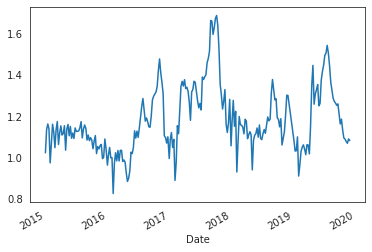

In [0]:
#Let's have a quick look at the time series of the averageprice we want to predict. It is a weekly frequency data.
conventional_AveragePrice = conventional_groupByDate['AveragePrice']
conventional_AveragePrice.plot()

In [0]:
conventional_AveragePrice = conventional_AveragePrice.to_frame()
#conventional_AveragePrice.to_frame().values
df = conventional_AveragePrice.copy()
conventional_AveragePrice.head()

,AveragePrice
Date,
2015-01-04,1.021719
2015-01-11,1.133906
2015-01-18,1.161406
2015-01-25,1.137500
2015-02-01,0.972656


###Data frame df is going to be the time series we focus on in this project. It consists of date index and a single column of 'AveragePrice'. The AveragePrice here is the mean avocado price for the contional type collected weekly (every sunday) in the USA from 2015 to 2019. 

#Model 1: Stateful LSTM model (FOCUS)

####LSTM model divides the data into batches and trains the model batch by batch. It has two modes: stateless and stateful. 

####In the stateless mode, LSTM updates the parameters of batch 1 and then it initiates cell states for batch 2. In contrast, with stateful mode it uses the output of batch 1 as the initial state for batch 2. 

####Therefore, when sequences in batches are related to each other, such as prices of commodity, in our case avocado, we should better use stateful mode. So we will focus on the stateful LSTM. Later we will also compare the results with the stateless model. 

####Moreover, we will only take the history price itself as a variant to predict future price, so this is going to be an univariant LSTM mode. In the end, we compare the performance of the stateful LSTM with classical time series prediction model Arima.




##Transform the dataset for TensorFlow Keras

#####Reference to https://github.com/curiousily/Deep-Learning-For-Hackers/blob/master/12.time-series-demand_prediction.ipynb

#####Reference to https://www.youtube.com/watch?v=nt6ux7-oWJg&list=PLYxUzjmNIvlClL-jsHjIOYY4fTkah0hxa&index=1


In [0]:
# #Refer to IBM skillnetwork course_ai crude oil

# #I used this to determine the length of the training_set.
# def get_train_length(dataset, batch_size, test_percent):
#   #substract test_percent to be  excluded from training, reserved for testset
#   length = len(dataset)
#   length *= 1 - test_percent
#   train_length_values = []
#   for x in range(int(length)):
#     modulo =x%batch_size
#     if (modulo ==0):
#       train_length_values.append(x)
#       #print(x)
#   return (max(train_length_values))

# #when the batch size is 10, test percentage is 0.2, the train set length is 200 for our df dataset.
# a = get_train_length(df,10,0.2)
# a

####Train test split

In [0]:
train_size = 200
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

200 53


####Scale the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
AveragePrice_transformer= MinMaxScaler()
AveragePrice_transformer = AveragePrice_transformer.fit(train[['AveragePrice']])
train['AveragePrice'] = AveragePrice_transformer.transform(train[['AveragePrice']])
test['AveragePrice'] = AveragePrice_transformer.transform(test[['AveragePrice']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



####Transform the shape of the data for the input of LSTM

In [0]:
#X is the history data you look back with length of the time steps, and y is the value you predict from the history data based on the algorithm you choose.

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):# for i in range(200-10): 0....189
        v = X.iloc[i:(i + time_steps)].values #X.iloc[0:10]:0,1,2,...9;X.iloc[1:11]:1,2,3,...10;......;X.iloc[189:198]:189,190,191...,198
        Xs.append(v) # Xs=[[X.iloc[0:10]], X.iloc[1:11], ...... , X.iloc[189:198]]     
        ys.append(y.iloc[i + time_steps])#X.iloc[10];X.iloc[11];X.iloc[10];......;X.iloc[199]
    return np.array(Xs), np.array(ys)

In [0]:
# time_steps = 50
#time_steps = 20
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape, y_train.shape)

(190, 10, 1) (190, 1)


##Define Stateful LSTM model

In [0]:
# With stateful LSTM: the training-set size must be divisible without remainder by the batch-size (modulo=0).
batch_size = 10
epoch_number = 30
Stateful_LSTM_model = Sequential()
Stateful_LSTM_model.add(LSTM(128,batch_input_shape=(batch_size,X_train.shape[1],X_train.shape[2]),stateful=True))
Stateful_LSTM_model.add(Dropout(0.2))
Stateful_LSTM_model.add((Dense(1)))
Stateful_LSTM_model.compile(loss='mse', optimizer='adam')


Stateful_LSTM_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (10, 128)                 66560     
_________________________________________________________________
dropout_1 (Dropout)          (10, 128)                 0         
_________________________________________________________________
dense_1 (Dense)              (10, 1)                   129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


##Deploy Stateful LSTM model

In [0]:
#Stateful LSTM fit
for i in range(epoch_number):
  print('Stateful LSTM Epoch:'+str(i))
  #Run through all data but the cell, hidden state are used for the next batch
  Stateful_LSTM_model.fit(X_train,y_train, epochs=1, batch_size=batch_size, shuffle=False)
  #Resets only the states but the weights, cel and hidden are kept
  Stateful_LSTM_model.reset_states()

# history = model.fit(
#     X_train, y_train, 
#     epochs=50, 
#     batch_size=10, 
#     #validation_split=0.1,
#     shuffle=True
# )


Stateful LSTM Epoch:0
19/19 [==============================] - 0s 7ms/step - loss: 0.0374
Stateful LSTM Epoch:1
19/19 [==============================] - 0s 7ms/step - loss: 0.0221
Stateful LSTM Epoch:2
19/19 [==============================] - 0s 7ms/step - loss: 0.0188
Stateful LSTM Epoch:3
19/19 [==============================] - 0s 7ms/step - loss: 0.0152
Stateful LSTM Epoch:4
19/19 [==============================] - 0s 7ms/step - loss: 0.0154
Stateful LSTM Epoch:5
19/19 [==============================] - 0s 7ms/step - loss: 0.0148
Stateful LSTM Epoch:6
19/19 [==============================] - 0s 7ms/step - loss: 0.0146
Stateful LSTM Epoch:7
19/19 [==============================] - 0s 7ms/step - loss: 0.0146
Stateful LSTM Epoch:8
19/19 [==============================] - 0s 7ms/step - loss: 0.0126
Stateful LSTM Epoch:9
19/19 [==============================] - 0s 7ms/step - loss: 0.0120
Stateful LSTM Epoch:10
19/19 [==============================] - 0s 7ms/step - loss: 0.0126
Stateful 

In [0]:
#save model
import h5py
Stateful_LSTM_model.save(filepath='Stateful_LSTM_model.h5')

In [0]:
# #load model
# import h5py
# Stateful_LSTM_model = load_model(filepath='Stateful_LSTM_model.h5')

##Evaluate the performance of the Stateful LSTM model

###Stateful LSTM prediction method 1 [FOCUS]: Take the true test dataset as the prediction input 
#### You predict the value by using the true data in the test dataset. So in this case, you take the first 10 values of the test dataset and predict the 11th data. Next, you take the 2nd to 11th data in the test dataset and predic thte 12th data, and so on and so forth. For the avocado use case, the application will be you take the last 2.5 month price data and predict the price of the next week. 

####Construct the input for the prediction and Predict

In [0]:
#The predict method of stateful LSTM model can only take input with very specific format, namely (time_step, time_step, n_features)
X_train[-20:-10].shape

(10, 10, 1)

In [0]:
#It predict a group 10 values at once.
Stateful_LSTM_model.predict(X_test[-10:])

array([[0.47251785],
       [0.46130872],
       [0.42970806],
       [0.41124463],
       [0.38343704],
       [0.34936064],
       [0.32353997],
       [0.30550867],
       [0.29431635],
       [0.29833746]], dtype=float32)

In [0]:
test.values[1]

array([0.34629295])

In [0]:
X_test.shape

(43, 10, 1)

In [0]:
def make_batch_from_flat_list(input_list, n_input, n_features):
  batch = []
  for i in range(n_input):
    lookback = input_list[i: i + n_input].reshape((n_input, n_features))
    batch.append(lookback)
  return np.array(batch)

n_input = X_train.shape[1]
n_features = X_train.shape[2]
flat_list_from_test_data = train.values[-19:]
stateful_prediction_list_from_test_data = []

for index_to_predict in range(test_size):
  batch = make_batch_from_flat_list(flat_list_from_test_data, n_input, n_features)
  prediction = Stateful_LSTM_model.predict(batch)
  stateful_prediction_list_from_test_data.append(prediction[-1][0])
  flat_list_from_test_data = flat_list_from_test_data[1:]
  flat_list_from_test_data = np.append(flat_list_from_test_data, test.values[index_to_predict])

####Transform back the predicted data

In [0]:
inv_stateful_from_test_data = AveragePrice_transformer.inverse_transform(np.array(stateful_prediction_list_from_test_data).reshape(-1, 1))
inv_stateful_from_test_data

array([[1.1291205 ],
       [1.1120169 ],
       [1.1118605 ],
       [1.1471882 ],
       [1.2192999 ],
       [1.2838682 ],
       [1.2477926 ],
       [1.1693789 ],
       [1.0979794 ],
       [1.0736616 ],
       [1.0161184 ],
       [0.98840296],
       [0.9979736 ],
       [1.0252904 ],
       [1.0556697 ],
       [1.0717188 ],
       [1.0692065 ],
       [1.0757672 ],
       [1.0812589 ],
       [1.0710458 ],
       [1.1021358 ],
       [1.2030697 ],
       [1.3370835 ],
       [1.3772357 ],
       [1.384235  ],
       [1.3739792 ],
       [1.3668653 ],
       [1.3248924 ],
       [1.2904655 ],
       [1.3122371 ],
       [1.3645004 ],
       [1.4229022 ],
       [1.4810153 ],
       [1.5249261 ],
       [1.5588723 ],
       [1.5579244 ],
       [1.5154765 ],
       [1.4419012 ],
       [1.3690171 ],
       [1.3075373 ],
       [1.269303  ],
       [1.2528324 ],
       [1.2480094 ],
       [1.2530134 ],
       [1.2429194 ],
       [1.2143694 ],
       [1.1966825 ],
       [1.171

####Create a dataframe to store the prediction results

In [0]:
#This dataframe includes train, test and prediction values with corresponding timestamps.
stateful_prediction_from_test_data_series = pd.Series(inv_stateful_from_test_data.flatten(), index=test.index[:])

train_list = pd.Series(np.array(conventional_AveragePrice[:train_size]).flatten(), index=conventional_AveragePrice[:train_size].index)
test_list = pd.Series(np.array(conventional_AveragePrice[train_size:len(conventional_AveragePrice)]).flatten(), index=conventional_AveragePrice[train_size:len(conventional_AveragePrice)].index)
stateful_prediction_from_test_data_df = pd.concat([train_list, test_list, stateful_prediction_from_test_data_series.iloc[10:]], axis=1)
stateful_prediction_from_test_data_df.columns = ['train', 'test', 'prediction']
#stateful_prediction_from_test_data_df.plot()

####Calculate the evaluation metrics

In [0]:


#MAE (mean absolute error)
import math
from sklearn.metrics import  mean_absolute_error, mean_squared_error
stateful_from_test_data_mae = mean_absolute_error(stateful_prediction_from_test_data_df.test['2019-02-10':], 
                                   stateful_prediction_from_test_data_df.prediction['2019-02-10':])
stateful_from_test_data_rmse = math.sqrt(mean_squared_error(stateful_prediction_from_test_data_df.test['2019-02-10':], 
                                             stateful_prediction_from_test_data_df.prediction['2019-02-10':]))

print('Stateful_LSTM_prediction_from_test_dataset mae: {mae_value:.3f}'.format(mae_value=stateful_from_test_data_mae))
print('Stateful_LSTM_prediction_from_test_dataset rmse: {rmse_value:.3f}'.format(rmse_value=stateful_from_test_data_rmse) )
                                                          




Stateful_LSTM_prediction_from_test_dataset mae: 0.063
Stateful_LSTM_prediction_from_test_dataset rmse: 0.082


####Plot the results of Stateful LSTM with prediction from test dataset

In [0]:
#Plot the stateful LSTM prediction for the testset data
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

fig = go.Figure()

scatter1=go.Scatter(x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['train'],
                   name='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8)
scatter2=go.Scatter(x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['test'],
                   name='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8)

scatter3=go.Scatter(x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['prediction'],
                   name='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8)






data=[scatter1,scatter2,scatter3]

layout = go.Layout(title='Time Series for Mean Daily Price (Stateful LSTM Prediction with Input of Test Dataset)',
                  xaxis={'title':'Date'},yaxis={'title':'Price'},
                   annotations=[
            go.layout.Annotation(
                text='mae: {mae_value:.3f} \n rmse: {rmse_value:.3f}'.format(mae_value=stateful_from_test_data_mae,rmse_value=stateful_from_test_data_rmse),
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.95,
                y=0.9,
                bordercolor='white',
                borderwidth=1,
                
            )
        ])
figure=go.Figure(data=data,layout=layout)
#iplot(figure)

figure.show(renderer="colab")

####A usecase example: Weekly trading of Avocado
If I want to trade the avocado on a week basis. And one of the task my model should do is to estimate if the price will rise or not for the next week. And in order to succeed, my model should predict the results correctly more than half of the time. Let's see if this is the case.

In [0]:
#Create a column calculateing the differnce between the neighboring test set data(price of week 2 minus the price of week 1)
stateful_prediction_from_test_data_df['test_diff'] = stateful_prediction_from_test_data_df.test.diff()
#Create a dummpy colume to see if the price rise or not for a test data compare to the last one: True is rise, False is not rise (fall).
stateful_prediction_from_test_data_df['test_diff_rise_or_not'] = stateful_prediction_from_test_data_df['test_diff']>0
#Create a column calculateing the differnce between the neighboring predictiong data(price of week 2 minus the price of week 1)
stateful_prediction_from_test_data_df['prediction_diff'] = stateful_prediction_from_test_data_df.prediction.diff()
#Create a dummpy colume to see if the price rise or not for a test data compare to the last one: True is rise, False is not rise (fall).
stateful_prediction_from_test_data_df['prediction_diff_rise_or_not'] = stateful_prediction_from_test_data_df['prediction_diff']>0

#Create a dummpy colume to see if the prediction's direction is right or not(True: the model predicts that the price will go up and the test data also shows that)
stateful_prediction_from_test_data_df['prediction_direction_right_or_not']= stateful_prediction_from_test_data_df['test_diff_rise_or_not']==stateful_prediction_from_test_data_df['prediction_diff_rise_or_not']

In [0]:
stateful_prediction_from_test_data_df.loc['2019-02-10':].head()

,train,test,prediction,test_diff,prediction_diff,test_diff_rise_or_not,prediction_diff_rise_or_not,prediction_direction_right_or_not
Date,,,,,,,,
2019-02-10,NaN,0.962344,1.016118,0.053750,NaN,True,False,False
2019-02-17,NaN,1.027500,0.988403,0.065156,-0.027715,True,False,False
2019-02-24,NaN,1.049219,0.997974,0.021719,0.009571,True,True,True
2019-03-03,NaN,1.060000,1.025290,0.010781,0.027317,True,True,True
2019-03-10,NaN,1.039375,1.055670,-0.020625,0.030379,False,True,False


In [0]:
stateful_prediction_from_test_data_df.loc['2019-02-10':].prediction_direction_right_or_not.value_counts()

True     25
False    18
Name: prediction_direction_right_or_not, dtype: int64

####Conclusion for the usecase:
In terms of the direction of the price prediction, the correct prediction is 40% more than the wrong ones by using the results of this model.

###Stateful LSTM prediction method 2: Take the predicted data as the input for prediction further in the future.
#### Instead of using the real data in the testset, you take the last part of the train dataset as the initial input to predict the time series with the same the timestamp as those of the testset. Then you use the predicted values as input to predict data further in the furture within the testset or beyond. In the end you did not use any of the data in the testset to predict, but you will use it to compare with the predicted value.


####Construct the input for the prediction and Predict

In [0]:


def make_batch_from_flat_list(input_list, n_input, n_features):
  batch = []
  for i in range(n_input):
    lookback = input_list[i: i + n_input].reshape((n_input, n_features))
    batch.append(lookback)
  return np.array(batch)

n_input = X_train.shape[1]
n_features = X_train.shape[2]
flat_list = train.values[-20:]
stateful_prediction_list = []

for index_to_predict in range(test_size):
  batch = make_batch_from_flat_list(flat_list, n_input, n_features)
  prediction = Stateful_LSTM_model.predict(batch)
  stateful_prediction_list.append(prediction[0][0])
  flat_list = flat_list[1:]
  flat_list = np.append(flat_list, prediction[0])



####Transform back the predicted data

In [0]:
inv_stateful_from_prediction = AveragePrice_transformer.inverse_transform(np.array(stateful_prediction_list).reshape(-1, 1))

####Create a dataframe to store the prediction results

In [0]:
stateful_prediction_from_pred_series = pd.Series(inv_stateful_from_prediction.flatten(), index=test.index[:])

train_list = pd.Series(np.array(conventional_AveragePrice[:train_size]).flatten(), index=conventional_AveragePrice[:train_size].index)
test_list = pd.Series(np.array(conventional_AveragePrice[train_size:len(conventional_AveragePrice)]).flatten(), index=conventional_AveragePrice[train_size:len(conventional_AveragePrice)].index)
stateful_prediction_from_prediction_df = pd.concat([train_list, test_list, stateful_prediction_from_pred_series], axis=1)
stateful_prediction_from_prediction_df.columns = ['train', 'test', 'prediction']
#stateful_prediction_from_prediction_df.plot()
#stateful_prediction_from_prediction_df.tail(60)

####Calculate the evaluation metrics

In [0]:
#Evaluare the prediction
#MAE (mean absolute error)
import math
from sklearn.metrics import  mean_absolute_error, mean_squared_error
stateful_prediction_from_prediction_mae = mean_absolute_error(stateful_prediction_from_prediction_df.test['2018-11-04':], 
                                   stateful_prediction_from_prediction_df.prediction['2018-11-04':])
stateful_prediction_from_prediction_rmse = math.sqrt(mean_squared_error(stateful_prediction_from_prediction_df.test['2018-11-04':], 
                                             stateful_prediction_from_prediction_df.prediction['2018-11-04':]))

print('Stateful_prediction_from_prediction_mae: {mae_value:.3f}'.format(mae_value=stateful_prediction_from_prediction_mae))
print('Stateful_prediction_from_prediction_rmse: {rmse_value:.3f}'.format(rmse_value=stateful_prediction_from_prediction_rmse) )
                                                          


Stateful_prediction_from_prediction_mae: 0.177
Stateful_prediction_from_prediction_rmse: 0.207


####Plot the results of the Stateful LSTM with prediction from the predicted data

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,subplot_titles=("Prediction from test dataset mae: {mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=stateful_from_test_data_mae,rmse_value=stateful_from_test_data_rmse),
                                                   "Prediction from predicted data mae: {mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=stateful_prediction_from_prediction_mae,rmse_value=stateful_prediction_from_prediction_rmse)))





import plotly.graph_objects as go


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['train'],
                   name='train',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['test'],
                   name='test',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['prediction'],
                   name='prediction',legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_test_data_df.index), row=1, col=1)


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['train'],
                   name='train',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['test'],
                   name='test',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['prediction'],
                   name='prediction',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_prediction_df.index), row=2, col=1)





# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Average Price",  row=2, col=1)



fig.update_layout(height=600, width=1000, title_text="Stateful LSTM: Comparison between the two prediction methods"
                  )





# fig.show()
fig.show(renderer="colab")


####Comments and Inspiration beyond this project: 
The first prediction clearly performances better than the second one. This tells us that the model we use here is not suitable for the use case of predicting long term in the future. The poor performance with the second prediction method is due to the nature of the Stateful LSTM we use: This univariant (only one variant: Avocado AveragePrice) single-step LSTM takes 10 timesteps of history data to predict 1 single timestep in the future. If we want to explore the long-term prediction case, the length scale of the prediction can be tuned in two ways:

#####1. Instead of using univariant time series forecasting LSTM, you can use multistep time series forecasting LSTM, so that by looking at 10 history data you predict more than 1 timestep in the future (refer to: https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/).



#####2. Instead of using weekly data, we can zoom out by looking at the aggregated monthly data. So by using the same LSTM, we can look back 10 month of data instead of 10 weeks of data and predict 1 month ahead instead of 1 week ahead. Depending on the use case, this method might be more conventient for the longer term prediction. Besides, the monthly aggreagated data might also provides less noise for the noise senstive algorithms.

#Model 2: Stateless LSTM model (Benchmark 1)

In order to have a better idea how does the Stateful LSTM perform, we perform the stateless LSTM to compare.

In [0]:
df = conventional_AveragePrice.copy()

##Transform the data for TensorFlow Keras

####Train test split

In [0]:
train_size = 200
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

200 53


####Scale the data

In [0]:
from sklearn.preprocessing import MinMaxScaler
AveragePrice_transformer= MinMaxScaler()
AveragePrice_transformer = AveragePrice_transformer.fit(train[['AveragePrice']])
train['AveragePrice'] = AveragePrice_transformer.transform(train[['AveragePrice']])
test['AveragePrice'] = AveragePrice_transformer.transform(test[['AveragePrice']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



####Transform the shape of the data for the input of LSTM

In [0]:
#X is the history data you look back with length of the time steps, and y is the value you predict from the history data based on the algorithm you choose.

def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):# for i in range(200-10): 0....189
        v = X.iloc[i:(i + time_steps)].values #X.iloc[0:10]:0,1,2,...9;X.iloc[1:11]:1,2,3,...10;......;X.iloc[189:198]:189,190,191...,198
        Xs.append(v) # Xs=[[X.iloc[0:10]], X.iloc[1:11], ...... , X.iloc[189:198]]     
        ys.append(y.iloc[i + time_steps])#X.iloc[10];X.iloc[11];X.iloc[10];......;X.iloc[199]
    return np.array(Xs), np.array(ys)

In [0]:
# time_steps = 50
#time_steps = 20
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train, time_steps)
X_test, y_test = create_dataset(test, test, time_steps)

print(X_train.shape, y_train.shape)

(190, 10, 1) (190, 1)


##Define Stateless LSTM model

In [0]:
Stateless_LSTM_model = Sequential()
#SingleLSTMLayer
Stateless_LSTM_model.add(LSTM(units=128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
Stateless_LSTM_model.add(Dropout(rate=0.2))
Stateless_LSTM_model.add(Dense(units=1))
Stateless_LSTM_model.compile(loss='mse', optimizer='adam')

Stateless_LSTM_model.summary()


###Other inspiration


# #SingleBidirectionalLSTMLayer
# model.add(Bidirectional(LSTM(units=128, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]))))
# model.add(Dropout(rate=0.2))
# model.add(Dense(units=1))
# model.compile(loss='mse', optimizer='adam')
# model.summary()


 
# #StackedLSTMlayers
# model.add(LSTM(units=128, activation='relu', return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(rate=0.2))

# model.add(LSTM(units=128, activation='relu', return_sequences = True))
# model.add(Dropout(rate=0.2))

# model.add(LSTM(units=128, activation='relu', return_sequences = True))
# model.add(Dropout(rate=0.2))

# model.add(LSTM(units=128, activation='relu'))
# model.add(Dropout(rate=0.2))
# model.add(Dense(units=1))
# model.compile(loss='mse', optimizer='adam')
# model.summary()








Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


##Deploy Stateless LSTM model

In [0]:
#Stateless fit
#Between the batches the cell and hidden states are lost

history = Stateless_LSTM_model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=30, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/50
6/6 [==============================] - 0s 50ms/step - loss: 0.1446 - val_loss: 0.0979
Epoch 2/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0758 - val_loss: 0.0412
Epoch 3/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0300 - val_loss: 0.0100
Epoch 4/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0260 - val_loss: 0.0125
Epoch 5/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0219 - val_loss: 0.0105
Epoch 6/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0203 - val_loss: 0.0127
Epoch 7/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0186 - val_loss: 0.0107
Epoch 8/50
6/6 [==============================] - 0s 15ms/step - loss: 0.0187 - val_loss: 0.0096
Epoch 9/50
6/6 [==============================] - 0s 14ms/step - loss: 0.0170 - val_loss: 0.0094
Epoch 10/50
6/6 [==============================] - 0s 13ms/step - loss: 0.0184 - val_loss: 0.0096
Epoch 11/50
6/6 [============

In [0]:
#save model
import h5py
Stateless_LSTM_model.save(filepath='Stateless_LSTM_model.h5')

##Evaluate the performance of the Stateless LSTM model

###Stateless LSTM prediction method 1: Take the true test dataset as the prediction input


####Construct the input for the prediction and Predict

In [0]:
#Stateless LSTM predicition
y_pred = Stateless_LSTM_model.predict(X_test)

####Transform back the predicted data

In [0]:
#Inverse transform the data.

y_train_inv = AveragePrice_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = AveragePrice_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = AveragePrice_transformer.inverse_transform(y_pred)

###Create a dataframe to store the prediction results

In [0]:
#Stateless
train_series = pd.Series(np.array(conventional_AveragePrice[:train_size]).flatten(), index=conventional_AveragePrice[:train_size].index)
test_series = pd.Series(np.array(conventional_AveragePrice[train_size:len(conventional_AveragePrice)]).flatten(), index=conventional_AveragePrice[train_size:len(conventional_AveragePrice)].index)
prediction_series = pd.Series(y_pred_inv.flatten(), index=test.index[time_steps:])
stateless_results_from_test_data_df = pd.concat([train_series, test_series, prediction_series], axis=1)
stateless_results_from_test_data_df.columns = ['train', 'test', 'prediction']
stateless_results_from_test_data_df.head()



,train,test,prediction
Date,,,
2015-01-04,1.021719,NaN,NaN
2015-01-11,1.133906,NaN,NaN
2015-01-18,1.161406,NaN,NaN
2015-01-25,1.137500,NaN,NaN
2015-02-01,0.972656,NaN,NaN


####Calculate the evaluation metrics

In [0]:
#Evaluare the testset prediction

#MAE (mean absolute error)
import math
from sklearn.metrics import  mean_absolute_error, mean_squared_error
stateless_results_from_test_data_df_mae = mean_absolute_error(stateless_results_from_test_data_df.test['2019-02-10':'2019-10-05'], stateless_results_from_test_data_df.prediction['2019-02-10':'2019-10-05'])
stateless_results_from_test_data_df_rmse = math.sqrt(mean_squared_error(stateless_results_from_test_data_df.test['2019-02-10':'2019-10-05'], stateless_results_from_test_data_df.prediction['2019-02-10':'2019-10-05']))


print('mae:',stateless_results_from_test_data_df_mae)
print('rmse:',stateless_results_from_test_data_df_rmse)

mae: 0.07157010162577905
rmse: 0.09664650412049507


####Plot the comparison between the Stateful and Stateless LSTM with prediction from test

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1,subplot_titles=('Stateful_mae: {mae_value:.3f} \n stateful_rmse: {rmse_value:.3f}'.format(mae_value=stateful_from_test_data_mae,rmse_value=stateful_from_test_data_rmse), 
                                                   'Stateless_mae: {mae_value:.3f} \n stateless_rmse: {rmse_value:.3f}'.format(mae_value=stateless_results_from_test_data_df_mae,rmse_value=stateless_results_from_test_data_df_rmse)))







import plotly.graph_objects as go


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['train'],
                   name='train',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['test'],
                   name='test',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['prediction'],
                   name='prediction',legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_test_data_df.index), row=1, col=1)


fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['train'],
                   name='train',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['test'],
                   name='test',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)


fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['prediction'],
                   name='prediction',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateless_results_from_test_data_df.index), row=2, col=1)





# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Average Price",  row=2, col=1)



fig.update_layout(height=600, width=1000, title_text="Comparison between the Stateful and Stateless LSTM",
                  
                  )






# fig.show()
fig.show(renderer="colab")

##Compare the metrics of the Stateful and Stateless LSTM metrics

  It seems that stateful LSTM is doing a bit better.

In [0]:
data = {'mae':[stateful_from_test_data_mae,stateless_results_from_test_data_df_mae],
        'rmse':[stateful_from_test_data_rmse,stateless_results_from_test_data_df_rmse]}
df_results_sum = pd.DataFrame(data,columns =['mae','rmse'],index=['Stateful LSTM','Stateless LSTM'])
df_results_sum.head


#Plot the stateful LSTM prediction for the testset data
import plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

figure = go.Figure()

scatter1=go.Scatter(x=df_results_sum.index,y=df_results_sum['mae'],
                   name='mae',mode='markers',marker=dict(size=30,
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8)
scatter2=go.Scatter(x=df_results_sum.index,y=df_results_sum['rmse'],
                   name='rmse',mode='markers',marker=dict(size=30,
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8)





data=[scatter1,scatter2]

layout = go.Layout(height=600, width=800,title='Comparison between the stateful and stateless LSTM prediction metrics',
                  xaxis={'title':'Model'},yaxis={'title':'Metrics'})
figure = go.Figure(data=data,layout=layout)
#iplot(figure)

figure.show(renderer="colab")




###Stateless LSTM prediction method 2: Take the predicted data as the input fot the prediction further in the future


To have a complete comparison, we also use the second prediction method on the Stateless LSTM model.

####Construct the input for the prediction and Predict

In [0]:
#If you use the predicted values as input to predict 

n_input = X_train.shape[1]
n_features = X_train.shape[2]
prediction_list = []

batch = train[-n_input:].values.reshape(( 1,n_input, n_features))

for i in range(1 * test_size):
    prediction_list.append(Stateless_LSTM_model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[prediction_list[i]]],axis=1)
      

####Transform back the predicted data

In [0]:
AveragePrice_transformer.inverse_transform(prediction_list).shape

(53, 1)

####Create a dataframe to store the prediction results

In [0]:
stateless_prediction_from_pred_series = pd.Series(AveragePrice_transformer.inverse_transform(prediction_list).flatten(), index=test.index[:])

train_list = pd.Series(np.array(conventional_AveragePrice[:train_size]).flatten(), index=conventional_AveragePrice[:train_size].index)
test_list = pd.Series(np.array(conventional_AveragePrice[train_size:len(conventional_AveragePrice)]).flatten(), index=conventional_AveragePrice[train_size:len(conventional_AveragePrice)].index)
stateless_prediction_from_pred_df = pd.concat([train_list, test_list, stateless_prediction_from_pred_series], axis=1)
stateless_prediction_from_pred_df.columns = ['train', 'test', 'prediction']
#stateless_prediction_from_pred_df.tail(60)

####Calculate the evaluation metrics

In [0]:
#Evaluare the prediction
#MAE (mean absolute error)
import math
from sklearn.metrics import  mean_absolute_error, mean_squared_error
stateless_prediction_from_pred_df_mae = mean_absolute_error(stateless_prediction_from_pred_df.test['2018-11-04':], 
                                   stateless_prediction_from_pred_df.prediction['2018-11-04':])
stateless_prediction_from_pred_df_rmse = math.sqrt(mean_squared_error(stateless_prediction_from_pred_df.test['2018-11-04':], 
                                             stateless_prediction_from_pred_df.prediction['2018-11-04':]))

print('stateless_prediction_from_pred_df_mae: {mae_value:.3f}'.format(mae_value=stateless_prediction_from_pred_df_mae))
print('stateless_prediction_from_pred_df_rmse: {rmse_value:.3f}'.format(rmse_value=stateless_prediction_from_pred_df_rmse) )

stateless_prediction_from_pred_df_mae: 0.129
stateless_prediction_from_pred_df_rmse: 0.150


####Plot the results of Stateless LSTM with prediction from the predicted data

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go




fig = make_subplots(rows=2, cols=1,subplot_titles=("Stateless prediction from test data mae: {mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=stateless_results_from_test_data_df_mae,rmse_value=stateless_results_from_test_data_df_rmse),
                                                   "Stateless prediction from predicted data mae: {mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=stateless_prediction_from_pred_df_mae,rmse_value=stateless_prediction_from_pred_df_rmse)))


fig.append_trace(go.Scatter(
    x=stateless_prediction_from_pred_df.index,y=stateless_prediction_from_pred_df['train'],
                   name='train',showlegend=False,mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=stateless_prediction_from_pred_df.index,y=stateless_prediction_from_pred_df['test'],
                   name='test',showlegend=False,mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=stateless_prediction_from_pred_df.index,y=stateless_prediction_from_pred_df['prediction'],
                   name='prediction',showlegend=False,mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateless_prediction_from_pred_df.index), row=2, col=1)


fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['train'],
                   name='train',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['test'],
                   name='test',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)


fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['prediction'],
                   name='prediction',legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateless_results_from_test_data_df.index), row=1, col=1)





# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)


# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Average Price",  row=2, col=1)



fig.update_layout(height=600, width=1000, title_text="Stateless LSTM: Comparison between two predicition methods"
                  )







# fig.show()
fig.show(renderer="colab")

####Comments:
Similarly, the second prediction methods show poor performance results for the Stateless LSTM.

##Plot a summary of all results from Stateful(less) models in two prediction methods

In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=2,subplot_titles=("Stateful_Test", "Stateless_Test","Stateful_Predicted","Stateless_Predicted"))



fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['train'],
                   name='train',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['test'],
                   name='test',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['prediction'],
                   name='prediction',legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_test_data_df.index), row=1, col=1)


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['train'],
                   name='train',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['test'],
                   name='test',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['prediction'],
                   name='prediction',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_prediction_df.index), row=2, col=1)




fig.append_trace(go.Scatter(
    x=stateless_prediction_from_pred_df.index,y=stateless_prediction_from_pred_df['train'],
                   name='train',showlegend=False,mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=2)

fig.append_trace(go.Scatter(
    x=stateless_prediction_from_pred_df.index,y=stateless_prediction_from_pred_df['test'],
                   name='test',showlegend=False,mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=2)

fig.append_trace(go.Scatter(
    x=stateless_prediction_from_pred_df.index,y=stateless_prediction_from_pred_df['prediction'],
                   name='prediction',showlegend=False,mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateless_prediction_from_pred_df.index), row=2, col=2)


fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['train'],
                   name='train',showlegend=False, legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=2)

fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['test'],
                   name='test',showlegend=False, legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=2)


fig.append_trace(go.Scatter(
    x=stateless_results_from_test_data_df.index,y=stateless_results_from_test_data_df['prediction'],
                   name='prediction',showlegend=False, legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateless_results_from_test_data_df.index), row=1, col=2)






# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date", row=1, col=2)
fig.update_xaxes(title_text="Date", row=2, col=2)
# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Average Price",  row=2, col=1)
fig.update_yaxes(title_text="Average Price", row=1, col=2)
fig.update_yaxes(title_text="Average Price",  row=2, col=2)


fig.update_layout(height=600, width=1000, title_text="Stateful(less) LSTM prediction from Test (Predicted) Dataset"
                  )






# fig.show()
fig.show(renderer="colab")

##Model 3: Classical Time Series Analysis by SARIMA (Benchmark 2)

Here we are going to employ a widely used time series analysis Autoregressive Integrated Moving Average (ARIMA) as the second benchmark, precisely SARIMA. S stands for Seasonal. On top of ARIMA, SARIMA can surport data with not only trend but also seasonal components. 

Refer to: https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/.

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose

##Prepare data for SARIMA

In [0]:
df = conventional_groupByDate.copy()
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,pop,lat,lon
Date,,,,,,,,,,,,,,
2015-01-04,1.021719,372397.583437,135844.061562,169849.761563,11108.452188,55595.308125,43913.780937,11446.961563,234.565625,2015,1,612212.196078,38.546966,-90.940838
2015-01-11,1.133906,333583.128906,122830.545156,143594.668750,11400.261719,55757.653281,46611.036250,8951.464687,195.152344,2015,1,612212.196078,38.546966,-90.940838
2015-01-18,1.161406,323254.015156,124008.136094,133179.913438,9913.391250,56152.574375,46423.023437,9634.755156,94.795781,2015,1,612212.196078,38.546966,-90.940838
2015-01-25,1.137500,319078.954687,123813.233906,125616.058594,9754.899844,59894.762344,49190.856250,10602.827344,101.078750,2015,1,612212.196078,38.546966,-90.940838
2015-02-01,0.972656,515223.592344,202577.815156,229125.203594,17503.426094,66017.147500,51127.177656,14110.095938,779.873906,2015,2,612212.196078,38.546966,-90.940838


In [0]:
df.index = pd.to_datetime(df.index)

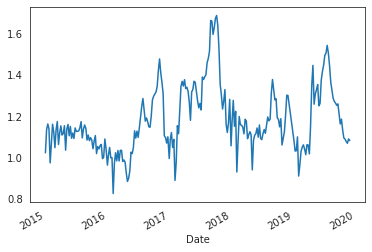

In [0]:
df['AveragePrice'].plot()

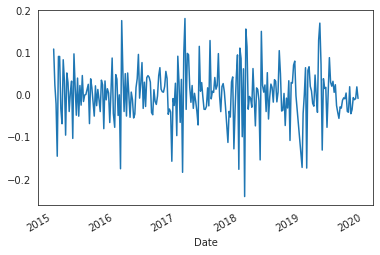

In [0]:
df['AveragePrice'].pct_change().plot()

In [0]:
prices = df['AveragePrice']

In [0]:
prices.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08',
               ...
               '2019-09-29', '2019-10-06', '2019-10-13', '2019-10-20',
               '2019-10-27', '2019-11-03', '2019-11-10', '2019-11-17',
               '2019-11-24', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

####Resample the data to monthly average data

Here I resample the data to the montly averaged data. Since there is a missing one month data. And the arima does not appreciate this.

In [0]:
monthly_prices = prices.resample('M').mean()
monthly_prices= monthly_prices.to_frame()
monthly_prices.head()

,AveragePrice
Date,
2015-01-31,1.113633
2015-02-28,1.079414
2015-03-31,1.106938
2015-04-30,1.131953
2015-05-31,1.116719


In [0]:
monthly_prices

,AveragePrice
Date,
2015-01-31,1.113633
2015-02-28,1.079414
2015-03-31,1.106938
2015-04-30,1.131953
2015-05-31,1.116719
2015-06-30,1.110703
2015-07-31,1.130430
2015-08-31,1.139844
2015-09-30,1.091562


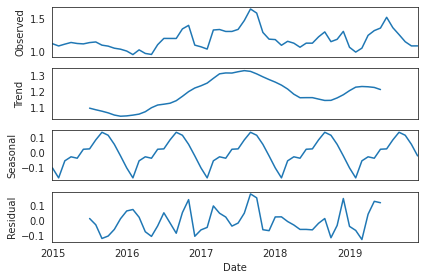

In [0]:

decomposition = seasonal_decompose(monthly_prices)
decomposition.plot()
plt.show()

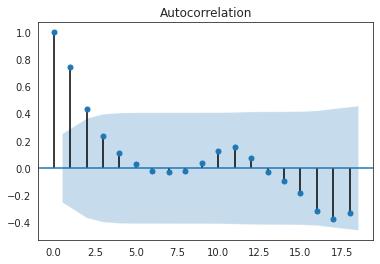

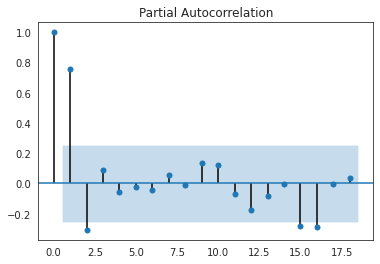

In [0]:
#Here we look at the autocorrelation and partial autocorrelation of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_prices)
plt.show()
plot_pacf(monthly_prices)
plt.show()

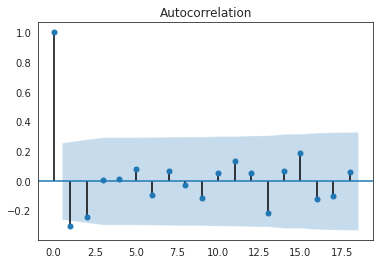

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning:

invalid value encountered in sqrt



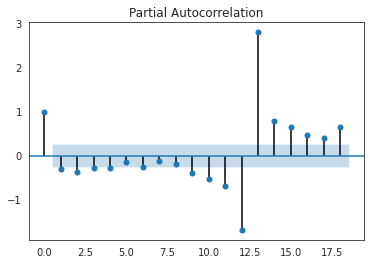

In [0]:
#Based on the above graph, we choose the twice difference
monthly_returns = monthly_prices.diff().diff().dropna()
plot_acf(monthly_returns)
plt.show()
plot_pacf(monthly_returns)
plt.show()

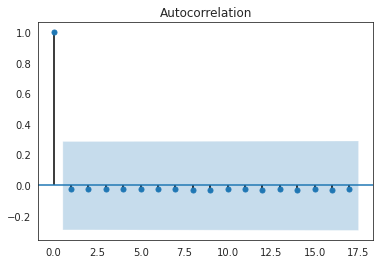

In [0]:
yearly_monthly_returns = monthly_returns.div(monthly_returns.shift(12)) - 1
plot_acf(yearly_monthly_returns.dropna())
plt.show()

####Train test split

In [0]:
train_pct = 200/253
total_len = len(monthly_prices)
monthly_prices_train = monthly_prices.iloc[0:int(train_pct * total_len)]
monthly_prices_test = monthly_prices.iloc[int(train_pct * total_len):total_len]

##Define the SARIMAX model

####Grid Search SARIMA Model Hyperparameters for Time Series Forecasting:
####Non-seasonal components: p - Trend autoregression order; d - Trend difference order; q - Trend moving average order.


####Seasonal components: P - Seasonal autoregressive order; D - Seasonal difference order; Q - Seasonal moving average order; m - The number of time steps for a single seasonal period.



In [0]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

def best_sarima_model(train_data,p,q,P,Q,d=1,D=1,s=12):
    best_model_aic = np.Inf 
    best_model_bic = np.Inf 
    best_model_hqic = np.Inf
    best_model_order = (0,0,0)
    models = []
    for p_ in p:
        for q_ in q:
            for P_ in P:
                for Q_ in Q:
                    try:
                        no_of_lower_metrics = 0
                        model = SARIMAX(endog=train_data,order=(p_,d,q_), seasonal_order=(P_,D,Q_,s),
                                        enforce_invertibility=False).fit()
                        models.append(model)
                        if model.aic <= best_model_aic: no_of_lower_metrics+=1
                        if model.bic <= best_model_bic: no_of_lower_metrics+=1
                        if model.hqic <= best_model_hqic:no_of_lower_metrics+=1
                        if no_of_lower_metrics >= 2:
                            best_model_aic = np.round(model.aic,0)
                            best_model_bic = np.round(model.bic,0)
                            best_model_hqic = np.round(model.hqic,0)
                            best_model_order = (p_,d,q_,P_,D,Q_,s)
                            current_best_model = model
                            models.append(model)
                            print("Best model so far: SARIMA" +  str(best_model_order) + 
                                  " AIC:{} BIC:{} HQIC:{}".format(best_model_aic,best_model_bic,best_model_hqic)+
                                  " resid:{}".format(np.round(np.exp(current_best_model.resid).mean(),3)))

                    except:
                        pass

    print('\n')
    print(current_best_model.summary())                
    return current_best_model, models

##Train the model

In [0]:
%%time

p = range(5)
q = range(5)
P = range(5)
Q = range(5)
d = 2
D = 1
s = 12
best_model_2diff = best_sarima_model(monthly_prices_train, p, q, P, Q, d, D, s)

Best model so far: SARIMA(0, 2, 0, 0, 1, 0, 12) AIC:-14.0 BIC:-13.0 HQIC:-14.0 resid:1.058
Best model so far: SARIMA(0, 2, 0, 1, 1, 0, 12) AIC:-22.0 BIC:-19.0 HQIC:-21.0 resid:1.05
Best model so far: SARIMA(0, 2, 1, 0, 1, 0, 12) AIC:-28.0 BIC:-25.0 HQIC:-27.0 resid:1.038
Best model so far: SARIMA(0, 2, 1, 1, 1, 0, 12) AIC:-37.0 BIC:-32.0 HQIC:-35.0 resid:1.032
Best model so far: SARIMA(0, 2, 1, 2, 1, 0, 12) AIC:-39.0 BIC:-33.0 HQIC:-37.0 resid:1.038


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals





                                 Statespace Model Results                                 
Dep. Variable:                       AveragePrice   No. Observations:                   47
Model:             SARIMAX(0, 2, 1)x(2, 1, 0, 12)   Log Likelihood                  23.404
Date:                            Mon, 11 May 2020   AIC                            -38.808
Time:                                    12:38:33   BIC                            -32.821
Sample:                                01-31-2015   HQIC                           -36.793
                                     - 11-30-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9998    133.213     -0.008      0.994    -262.093     260.093
ar.S.L12      -0.8392      0.121 

##Evaluate the performance of the SARIMA model

####Different from the LSTM models, SARIMA does not need input of the variable itself. All it needs is the timestamps at which you want to predict the values.

In [0]:
monthly_prices.index[-len(monthly_prices_test):]

DatetimeIndex(['2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

####Predict

In [0]:
prediction = best_model_2diff[0].predict(start=monthly_prices.index[0],end=monthly_prices.index[-1]).iloc[2:]
test_prediction = prediction.iloc[-len(monthly_prices_test):]

In [0]:
prediction

2015-03-31    1.045195
2015-04-30    1.134461
2015-05-31    1.156969
2015-06-30    1.101484
2015-07-31    1.104687
2015-08-31    1.150156
2015-09-30    1.149258
2015-10-31    1.043281
2015-11-30    1.062578
2015-12-31    1.014180
2016-01-31    1.231664
2016-02-29    0.585013
2016-03-31    0.957961
2016-04-30    1.057664
2016-05-31    0.933232
2016-06-30    0.931682
2016-07-31    1.137947
2016-08-31    1.231625
2016-09-30    1.167948
2016-10-31    1.204361
2016-11-30    1.346381
2016-12-31    1.420868
2017-01-31    1.079549
2017-02-28    1.043891
2017-03-31    1.102238
2017-04-30    1.357813
2017-05-31    1.362244
2017-06-30    1.415152
2017-07-31    1.387328
2017-08-31    1.357655
2017-09-30    1.473273
2017-10-31    1.753102
2017-11-30    1.622197
2017-12-31    1.129493
2018-01-31    1.168656
2018-02-28    1.164079
2018-03-31    1.161638
2018-04-30    1.163572
2018-05-31    1.092625
2018-06-30    1.048571
2018-07-31    1.141890
2018-08-31    1.141207
2018-09-30    1.206956
2018-10-31 

####Create a dataframe to store the prediction results

In [0]:
sarima_train_test_predict_df = pd.concat([monthly_prices_train, monthly_prices_test, prediction.loc[monthly_prices_test.index]], axis=1)
sarima_train_test_predict_df.columns = ['train', 'test', 'prediction']
#sarima_train_test_predict_df.plot()

####Calculate the evaluation metrics

In [0]:
#Evaluare the testset prediction

#MAE (mean absolute error)
import math
from sklearn.metrics import  mean_absolute_error, mean_squared_error
sarima_mae = mean_absolute_error(monthly_prices_test, prediction.loc[monthly_prices_test.index])
sarima_rmse = math.sqrt(mean_squared_error(monthly_prices_test, prediction.loc[monthly_prices_test.index]))



print('mae:',sarima_mae, ' SARIMA')
print('rmse:',sarima_rmse, ' SARIMA')

# OLD
# rmse_2diff_train = np.sqrt(best_model_2diff[0].resid[2:].pow(2).mean())
# rmse_2diff_test = np.sqrt(test_prediction.to_frame().rename(columns={0: 'AveragePrice'}).sub(monthly_prices_test).pow(2).mean())
# print(f'train rmse {rmse_2diff_train}')
# print(f'test rmse {rmse_2diff_test}')

mae: 0.15887608765473088  SARIMA
rmse: 0.1856815632241715  SARIMA


In [0]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=3, cols=1,subplot_titles=("Stateful LSTM prediction from true test dataset mae: {mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=stateful_from_test_data_mae,rmse_value=stateful_from_test_data_rmse),
                                                   "Stateful LSTM prediction from predicted data mae: {mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=stateful_prediction_from_prediction_mae,rmse_value=stateful_prediction_from_prediction_rmse),
                                                   "Classical SARIMA mae:{mae_value:.3f}, rmse:{rmse_value:.3f}".format(mae_value=sarima_mae,rmse_value=sarima_rmse)))








fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['train'],
                   name='train',legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['test'],
                   name='test',legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=1, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_test_data_df.index,y=stateful_prediction_from_test_data_df['prediction'],
                   name='prediction',legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_test_data_df.index), row=1, col=1)


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['train'],
                   name='train',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)

fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['test'],
                   name='test',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=2, col=1)


fig.append_trace(go.Scatter(
    x=stateful_prediction_from_prediction_df.index,y=stateful_prediction_from_prediction_df['prediction'],
                   name='prediction',showlegend=False, mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=stateful_prediction_from_prediction_df.index), row=2, col=1)



fig.append_trace(go.Scatter(
    x=sarima_train_test_predict_df.index,y=sarima_train_test_predict_df['train'],
                   name='train',showlegend=False,legendgroup='train',mode='lines+markers',marker=dict(
                                 color='rgb(158,202,225)',
                                 line=dict(
                                 color='rgb(8,48,107)',
                                 width=1.5)),
                                opacity=0.8), row=3, col=1)

fig.append_trace(go.Scatter(
    x=sarima_train_test_predict_df.index,y=sarima_train_test_predict_df['test'],
                   name='test',showlegend=False,legendgroup='test',mode='lines+markers',marker=dict(
                                 color='rgb(248,146,146)',
                                 line=dict(
                                 color='rgb(249,52,52)',
                                 width=1.5)),
                                opacity=0.8), row=3, col=1)

fig.append_trace(go.Scatter(
    x=sarima_train_test_predict_df.index,y=sarima_train_test_predict_df['prediction'],
                   name='prediction',showlegend=False,legendgroup='prediction',mode='lines+markers',marker=dict(
                                 color='rgb(249,249,11)',
                                 line=dict(
                                 color='rgb(158,158,14)',
                                 width=1.5)),
                                opacity=0.8,
                            hovertext=sarima_train_test_predict_df.index), row=3, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)
fig.update_xaxes(title_text="Date", row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Average Price", row=1, col=1)
fig.update_yaxes(title_text="Average Price",  row=2, col=1)
fig.update_yaxes(title_text="Average Price",  row=3, col=1)



fig.update_layout(height=600, width=1000, title_text="Comparison between Stateful LSTM (two prediction methods) and SARIMA"
                  )





# fig.show()
fig.show(renderer="colab")


#Inspiration beyond the scope of this project

####We can zoom out by looking at the monthly averaged data instead of the weekly one.

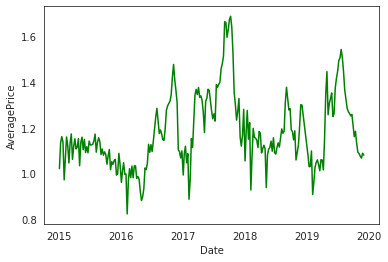

In [0]:
#Raw data: weekly data.
sns.lineplot(x=conventional_groupByDate.index,y='AveragePrice',data=conventional_groupByDate,color='green')


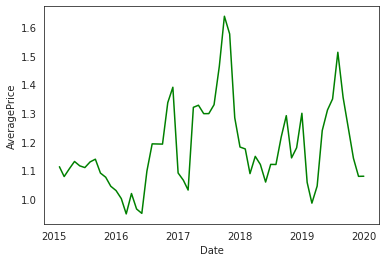

In [0]:
#If we look at a higher aggregation level of Month instead of Week. The time series looks like this.
#It appears that it has some seasonality with some trend across the year on top of it.
conventional_ByMonth = conventional_groupByDate.resample('M').mean()
sns.lineplot(x=conventional_ByMonth.index,y='AveragePrice',data=conventional_ByMonth,color='green')


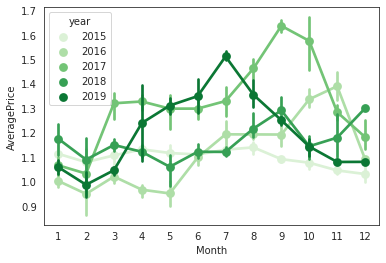

In [0]:
#To better view the seasonablity we can plot the monthly time series for each year.
sns.pointplot(data = conventional_groupByDate, x= 'Month', y='AveragePrice', hue='year', palette = 'Greens')